# 1. Install Dependencies and Setup

In [5]:
!pip install matplotlib

In [6]:
!pip list

Package                      Version
---------------------------- ----------
absl-py                      2.0.0
asttokens                    2.4.1
astunparse                   1.6.3
cachetools                   5.3.2
certifi                      2023.11.17
charset-normalizer           3.3.2
colorama                     0.4.6
comm                         0.2.1
contourpy                    1.2.0
cycler                       0.12.1
debugpy                      1.8.0
decorator                    5.1.1
exceptiongroup               1.2.0
executing                    2.0.1
flatbuffers                  23.5.26
fonttools                    4.47.2
gast                         0.4.0
google-auth                  2.26.2
google-auth-oauthlib         0.4.6
google-pasta                 0.2.0
grpcio                       1.60.0
h5py                         3.10.0
idna                         3.6
importlib-metadata           7.0.1
importlib-resources          6.1.1
ipykernel                    6.28.0
ip

In [2]:
import tensorflow as tf
import os

In [7]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU') # this gives the available GPUs


print(gpus)
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True) # this limits the GPU memory usage

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [8]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Remove dodgy images

In [3]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [4]:
data_dir = 'data'  # directory where data is

This part is extra ///////////////////////////////////////////////////////

In [5]:
os.listdir(data_dir) # this gives the files in the directory

['Angry', 'happy', 'sad']

In [12]:
os.listdir(os.path.join(data_dir,'happy')) # this gives the all the images in the folder

['05-12-21-happy-people.jpg',
 '07-120104-happy_people_are_not_nice_people.jpg',
 '1-2.jpg',
 '1000_F_42220133_toAU6USGY9jVr2XJFLssfG00cSYIJ173.jpg',
 '11-Habits-of-Truly-Happy-People.jpg',
 '154006829.jpg',
 '170404-happy-workers-feature.jpg',
 '1902539.jpg',
 '1902540.jpg',
 '1902587.jpg',
 '1920px-face-smile.svg_.png.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '227-2271622_happy-people-business-team-celebrating-png.png',
 '60632274._UY200_.jpg',
 '7-Habits-of-Happy-People-image.jpeg',
 '7-principles-of-successful-and-happy-people.png',
 '7Y57w0983emdERAoQylUHIGkoEk1cIFvPkXDbeA2lVA.jpg',
 '8cxKy5g9i.jpg',
 '960x0.jpg',
 'ADea4I4CgV4-hlxUOAdFjyNYonWRHO6Pu4jWXKk9BJScXws64-c-mo.jpg',
 'A_Sep20_14_1189155141.jpg',
 'bigstock-Portrait-Of-Smiling-Employees-272904928-min-scaled.jpg',
 'blog_image_20180219221810890.jpg',
 'brady-bunch-3.jpg',
 'e162ccda8ce0f197f8863f327add9233.jpg',
 'fiendship-concept-smiling-friends-communication-weekend-university-123724503.jpg',
 'friends-happy-190821-800x450

In [13]:
image_exts = ['jpeg','jpg', 'bmp', 'png'] # these are the accepted image types

In [ ]:
# this loops through the all the files in the folder
for image_class in os.listdir(data_dir): 
    print(image_class)
    for image in os.listdir(os.path.join(data_dir, image_class)):
        print(image)

In [16]:
img = cv2.imread(os.path.join('data','happy','_happy_jumping_on_beach-40815.jpg')) # this way we can get any kind of file by giving the path of the file

In [17]:
img.shape # this gives the matrix dimentions of the image

(213, 320, 3)

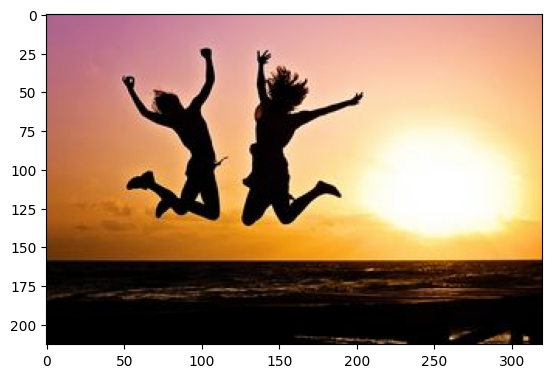

In [22]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

///////////////////////////////////////////////////////////////////////////////////////////////////////

In [13]:
# this part is going through each image in the data and check them whether they are readable or not if they are not readable then they will be removed
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [15]:
data = tf.keras.utils.image_dataset_from_directory('data') # this data cannot be used directly


Found 309 files belonging to 3 classes.
<BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [35]:
data_iterator = data.as_numpy_iterator() # because of that we use numpy iterator to make it easy to use


In [29]:
batch = data_iterator.next()

In [24]:
batch[0].shape # images represented as numpy arrays

(32, 256, 256, 3)

In [37]:
# class 1 = SAD people
# class 2 = HAPPY people
batch = data_iterator.next()
batch[1]

array([2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 1, 2, 1, 2, 1, 0, 2, 1, 1, 1, 2, 2,
       1, 2, 2, 1, 1, 2, 2, 0, 0, 2])

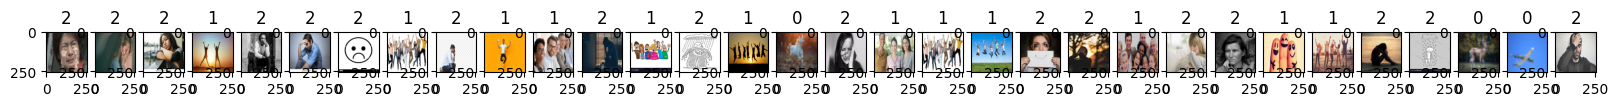

In [39]:
fig, ax = plt.subplots(ncols=32, figsize=(20,20))
for idx, img in enumerate(batch[0][:32]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [37]:
data = data.map(lambda x,y: (x/255, y))

In [38]:
data.as_numpy_iterator().next()

(array([[[[0.25896907, 0.21191023, 0.15700828],
          [0.26405483, 0.21655944, 0.16078432],
          [0.27596506, 0.22498468, 0.16223958],
          ...,
          [0.5876302 , 0.5886412 , 0.5330116 ],
          [0.596515  , 0.6039216 , 0.5525046 ],
          [0.59607846, 0.6039216 , 0.5529412 ]],
 
         [[0.26121324, 0.2141544 , 0.15925245],
          [0.2660492 , 0.21855378, 0.16277865],
          [0.2763815 , 0.22540109, 0.16265598],
          ...,
          [0.6048429 , 0.6058539 , 0.55022436],
          [0.6099801 , 0.61738664, 0.56596965],
          [0.6095435 , 0.61738664, 0.56640625]],
 
         [[0.26514247, 0.21695772, 0.15980393],
          [0.2696663 , 0.22117034, 0.16339408],
          [0.27781862, 0.22683823, 0.16409314],
          ...,
          [0.6187991 , 0.6170591 , 0.56234646],
          [0.616792  , 0.6228219 , 0.57052976],
          [0.6162301 , 0.6229473 , 0.570841  ]],
 
         ...,
 
         [[0.02745098, 0.03921569, 0.05882353],
          [0.02745

# 5. Split Data

In [39]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [40]:
train_size

7

In [41]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [42]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [44]:
model = Sequential()

In [45]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [46]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [48]:
logdir='logs'

In [49]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [50]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


7/7 [==============================] - 8s 297ms/step - loss: 0.9595 - accuracy: 0.4955 - val_loss: 0.6576 - val_accuracy: 0.5156
Epoch 2/20
7/7 [==============================] - 3s 261ms/step - loss: 0.6534 - accuracy: 0.5893 - val_loss: 0.5733 - val_accuracy: 0.6562
Epoch 3/20
7/7 [==============================] - 3s 273ms/step - loss: 0.5668 - accuracy: 0.7054 - val_loss: 0.4439 - val_accuracy: 0.8750
Epoch 4/20
7/7 [==============================] - 3s 273ms/step - loss: 0.5016 - accuracy: 0.7321 - val_loss: 0.4336 - val_accuracy: 0.7969
Epoch 5/20
7/7 [==============================] - 3s 267ms/step - loss: 0.3920 - accuracy: 0.8348 - val_loss: 0.3696 - val_accuracy: 0.8594
Epoch 6/20
7/7 [==============================] - 3s 275ms/step - loss: 0.2862 - accuracy: 0.9107 - val_loss: 0.1948 - val_accuracy: 0.8750
Epoch 7/20
7/7 [==============================] - 3s 271ms/step - loss: 0.2227 - accuracy: 0.9330 - val_loss: 0.1637 - val_accuracy: 0.9219
Epoch 8/20
7/7 [===============

# 8. Plot Performance

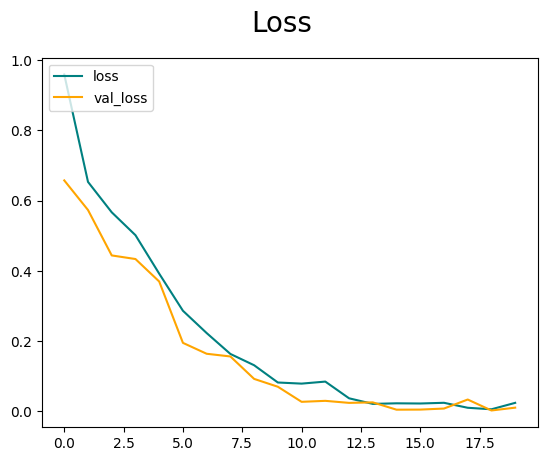

In [51]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

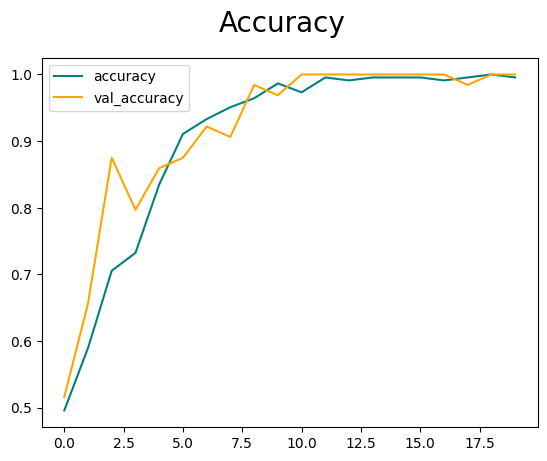

In [52]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [53]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [54]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [55]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 1s 504ms/step


In [56]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [57]:
import cv2

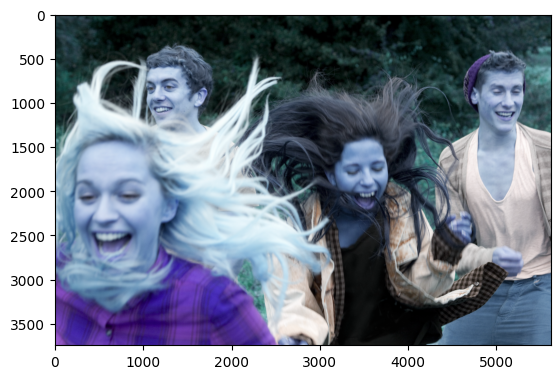

In [86]:
img = cv2.imread('154006829.jpg')
plt.imshow(img)
plt.show()

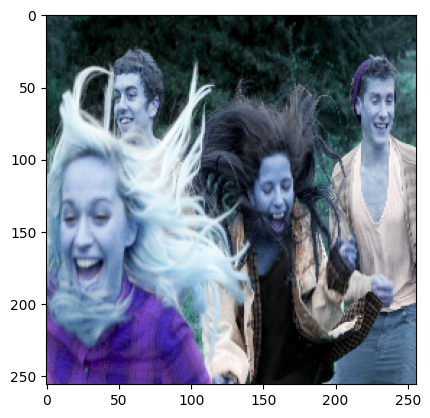

In [87]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [88]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 21ms/step


In [89]:
yhat

array([[0.39001566]], dtype=float32)

In [90]:
if yhat > 0.5: 
    print(f'Predicted class is Sad')
else:
    print(f'Predicted class is Happy')

Predicted class is Happy


# 11. Save the Model

In [45]:
from tensorflow.keras.models import load_model

In [46]:
model.save(os.path.join('models','imageclassifier.h5'))

In [47]:
new_model = load_model('models/imageclassifier.h5')

In [48]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 94ms/step


array([[0.02467397]], dtype=float32)